# Assignment: Linear Models
## Do two questions in total: "Q1+Q2" or "Q1+Q3"
### `! git clone https://github.com/ds3001f25/linear_models_assignment.git`

## Setup

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

## Q1

**Q1.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.   

I can't even lie. This was one of the most painful questions I have ever had to complete in the last 3 years I have been at UVA. Solely because Q1.5 and Q1.6 are so up in the air. In any case, here is my work. Enjoy my suffering and see below for my "answer" on my "intuition" for Q1.6.

![Q1 All](images/hpb2gv-suffering.jpg)

### Q1.6 Explanation
OK. I literally rummaged through every single speck of the lecture notes. I have now gathered that technically I could have actually simplified A and C more to Covariance and Variance functions (like how it was done in the Angle and Correlation section). Here we go:

$$
\begin{bmatrix}
Var(X_1) & Cov(X_1, X_2) \\\
Cov(X_1, X_2) & Var(X_2)
\end{bmatrix}
$$

While the C vector is technically:

$$
\begin{bmatrix}
Cov(X_1, Y) \\\
Cov(X_2, Y)
\end{bmatrix}
$$

Now, what does that actually mean? Well, to be honest... I haven't got a clue. If we do some matrix multiplication we end up with the two equations:

$$
Var(X_1)b_1 + Cov(X_1, X_2)b_2 = Cov(X_1, Y)
$$
and
$$
Cov(X_1, X_2)b_1 + Var(X_2)b_2 = Cov(X_2, Y)
$$

and to be frank, this makes even LESS sense to me. So I hope I can just write this and get credit - I think it just has something to do with how we're considering the individual variables $X_1$ and $X_2$ with slope terms (hence the variances), and then the interactions between the two (hence the covariances), and that is equivalent to the interactions between $X_1$ and $X_2$ and the predicted variable $Y$? That's really the only thing I can think of based on just the definition of covariance + variance but if there's a better answer... I'm tired :(

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

### Q2.1

In [2]:
cars_df = pd.read_csv('./data/cars_hw.csv')
cars_df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [3]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB


In [4]:
cars_df['Make'].unique()

array(['Volkswagen', 'Hyundai', 'Honda', 'Renault', 'Tata', 'Chevrolet',
       'Maruti Suzuki', 'Toyota', 'Mahindra', 'Ford', 'Nissan', 'Jeep',
       'MG Motors', 'Kia', 'Skoda', 'Datsun'], dtype=object)

In [5]:
cars_df['Make_Year'].unique()

array([2017, 2016, 2019, 2012, 2021, 2020, 2013, 2022, 2018, 2014, 2011,
       2015])

In [6]:
cars_df['Color'].unique()

array(['silver', 'red', 'white', 'bronze', 'orange', 'grey', 'blue',
       'yellow', 'beige', 'brown', 'golden', 'black', 'maroon', 'purple',
       'green'], dtype=object)

In [7]:
cars_df['Body_Type'].unique()

array(['sedan', 'crossover', 'suv', 'hatchback', 'muv'], dtype=object)

In [8]:
cars_df['Mileage_Run'].describe()

count      976.000000
mean     41571.195697
std      24390.995134
min       1117.000000
25%      22676.750000
50%      37570.500000
75%      57421.250000
max      99495.000000
Name: Mileage_Run, dtype: float64

In [9]:
cars_df['No_of_Owners'].unique()

array(['1st', '2nd', '3rd'], dtype=object)

In [10]:
cars_df['Seating_Capacity'].describe()

count    976.000000
mean       5.095287
std        0.446224
min        4.000000
25%        5.000000
50%        5.000000
75%        5.000000
max        8.000000
Name: Seating_Capacity, dtype: float64

In [11]:
cars_df['Fuel_Type'].unique()

array(['diesel', 'petrol', 'petrol+cng'], dtype=object)

In [12]:
cars_df['Transmission'].unique()

array(['7-Speed', '5-Speed', '6-Speed', 'CVT', '4-Speed'], dtype=object)

In [13]:
cars_df['Transmission_Type'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [14]:
cars_df['Price'].describe()

count    9.760000e+02
mean     7.410195e+05
std      3.673234e+05
min      1.880000e+05
25%      4.757500e+05
50%      6.665000e+05
75%      8.830000e+05
max      2.941000e+06
Name: Price, dtype: float64

### Q2.2

### Q2.3

### Q2.4

### Q2.5

### Q2.6

## Q2 (In case you're curious, I snapped it out of existence)

## Q3

**Q3.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

### Q3.1

In [15]:
heart_df = pd.read_csv('./data/heart_hw.csv')
heart_df.head()

,Unnamed: 0,age,transplant,y
0,1,53,control,0
1,2,43,control,0
2,3,52,control,0
3,4,52,control,0
4,5,54,control,0


#### Q3.1a

In [16]:
heart_df_control = heart_df[heart_df['transplant'] == 'control']
heart_df_control_survived = len(heart_df_control[heart_df_control['y'] == 1])
heart_df_control_total = len(heart_df_control)
heart_df_control_survival_prop = heart_df_control_survived / heart_df_control_total
heart_df_control_survival_prop

0.11764705882352941

Pretty low survival rate here for the control group...

In [17]:
heart_df_treatment = heart_df[heart_df['transplant'] == 'treatment']
heart_df_treatment_survived = len(heart_df_treatment[heart_df_treatment['y'] == 1])
heart_df_treatment_total = len(heart_df_treatment)
heart_df_treatment_survival_prop = heart_df_treatment_survived / heart_df_treatment_total
heart_df_treatment_survival_prop

0.34782608695652173

#### Q3.1b

And there's the treatment group. So the difference between them?

In [18]:
heart_df_treatment_survival_prop - heart_df_control_survival_prop

0.23017902813299232

So there's our "average treatment effect"!

### Q3.2

In [19]:
transplant_dummy_vars = pd.get_dummies(heart_df['transplant'], drop_first=True)
y_transplant_reg = LinearRegression(fit_intercept=True).fit(transplant_dummy_vars, heart_df['y'])
print(y_transplant_reg.intercept_)
print(y_transplant_reg.coef_)

0.11764705882352941
[0.23017903]


2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.


So these values make a lot of sense. Notably, the intercept of the regression is 0.11765. Now, what does the intercept mean? It's when the x variable, transplant, is 0. This corresponds to the control group and it's survival proportion when estimating y. Now, how about the coefficient? Well, let's consider the other value of transplant - treatment, which is mapped to a value of x=1, I suppose. This is true because the coefficient, 0.23018 is actually our difference between survival of treated and non-treated patients, and when you plug in x=1 into this linear model you get 0.34783 which matches the survival proportion of treated patients!

### Q3.3

In [20]:
transplant_dummy_vars = pd.get_dummies(heart_df['transplant'], drop_first=True)
features = pd.concat([heart_df['age'], transplant_dummy_vars], axis=1)
y_transplant_reg = LinearRegression(fit_intercept=True).fit(features, heart_df['y'])
print(y_transplant_reg.intercept_)
print(y_transplant_reg.coef_)

0.7019569721740946
[-0.01360722  0.26470169]


The intercept changes quite a bit, to a value unfamiliar. It increases from 0.11765 to 0.70196. My best guess would be that the average age lies somewhere around 43 based on a quick calculation reversal since doing so would net the intercept back down to our transplant-only intercept. Let's see if that's true!

In [21]:
heart_df['age'].mean()

np.float64(44.640776699029125)

Close enough - so yeah, that's my explanation.

### Q3.4

This question had a lot of parts. Let's break it down! 

> Build a more flexible model that allows for non-linear age effects and interactions between age and treatment.

So I decided to both perform an arcsinh transformation on age, and then also expand to 3 degrees of polynomial features! That way, maybe we can get a better model since it is more flexible.

In [ ]:
arcsinh_age = np.arcsinh(heart_df[['age']])
transplant_dummy_vars = pd.get_dummies(heart_df['transplant'], drop_first=True)
expander = PolynomialFeatures(degree=3,include_bias=False)
Z = expander.fit_transform(arcsinh_age)
Z = pd.DataFrame(Z, columns=['arcsinh_age', 'arcsinh_age_squared', 'arcsinh_age_cubed'])
features = pd.concat([Z, transplant_dummy_vars], axis=1)
y = heart_df['y']

> Use a train-test split to validate your model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=250113)

In [103]:
y_transplant_flex = LinearRegression(fit_intercept=True).fit(X_train, y_train)

In [104]:
predicted_test_vals = y_transplant_flex.predict(X_test)

In [105]:
mean_squared_error(y_test, predicted_test_vals)

0.13624617560158786

> Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not

In [107]:
age_range = np.linspace(8, 65, 100)
age_range_transformed = np.arcsinh(age_range)
# idk I kept getting an error telling me to add this reshape(-1, 1) thing
age_range_expanded = expander.transform(age_range_transformed.reshape(-1, 1))
age_range_df = pd.DataFrame(age_range_expanded, columns=['arcsinh_age', 'arcsinh_age_squared', 'arcsinh_age_cubed'])
full_treatment = np.ones(100, dtype=bool)
no_treatment = np.zeros(100, dtype=bool)
Z_full = pd.concat([age_range_df, pd.DataFrame({'treatment': full_treatment})], axis=1)
Z_none = pd.concat([age_range_df, pd.DataFrame({'treatment': no_treatment})], axis=1)
predicted_full_treatment = y_transplant_flex.predict(Z_full)
predicted_no_treatment = y_transplant_flex.predict(Z_none)

c:\Users\kevin\OneDrive\Desktop\f25\DS3001\linear_models_assignment\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


OK. Now let's use the linear space grid to plot our values! I'm also going to include the test set values and their treated/untreated values to show whether an age group survived or not :)

In [121]:
original_test_df = heart_df.loc[X_test.index]
treated_test_df = original_test_df[original_test_df['transplant'] == 'treatment']
untreated_test_df = original_test_df[original_test_df['transplant'] == 'control']

In [122]:
untreated_test_df

,Unnamed: 0,age,transplant,y
5,6,36,control,0
31,32,45,control,0
28,29,59,control,0
9,10,51,control,0
54,55,41,control,0
2,3,52,control,0
12,13,56,control,0


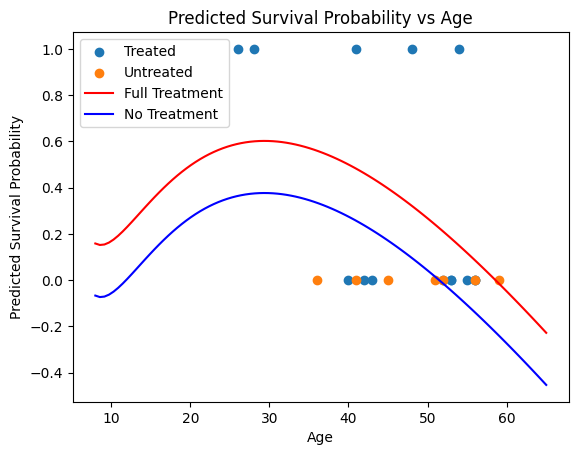

In [ ]:
plt.scatter(treated_test_df['age'], treated_test_df['y'], label='Treated')
plt.scatter(untreated_test_df['age'], untreated_test_df['y'], label='Untreated')
plt.plot(age_range, predicted_full_treatment, label='Full Treatment', color='red')
plt.plot(age_range, predicted_no_treatment, label='No Treatment', color='blue')
plt.xlabel('Age')
plt.ylabel('Predicted Survival Probability')
plt.title('Predicted Survival Probability vs Age')
plt.legend()
plt.show()

> Describe what you see.

Ok I feel like it's not a big shocker that this is what the prediction line looks like. Firstly, it makes sense that people that are too young, or too old tend to have lower survival probability! Seems like the model was fitted such that people around their 30s (often referred to as physical prime) tend to have the highest survival chance in both groups.

Now - for treated individuals, they obviously have a higher predicted survival probability than no treatment, hence the sort of shift we see here.

Lastly, I also put on the true test labels - seems like the model isn't the greatest in the world given that for some older cases where they were treated, they lived (even though the models predicted probability isn't very high at those same verticals).

### Q3.5

The biggest thing I would be concerned about is that this model is genuinely not very good. I mean I already outlined earlier some issues - I do not think that this model is good enough to warrant being used for life or death situations. I think that there likely needs to be more features beyond just age and transplant received - otherwise, we are just deciding who is contacted about a potential organ pretty much on the basis of age. That in itself is a huge ethical concern because then we would be discriminating care by age. Likewise, there are probably a whole slew of other factors that could be considered that would make this a much stronger model. Those are my immediate concerns about build and deployment.